In [1]:
people = {"Dad": 72, "Mom": 67, "Christal": 40}
people["Me"] = 42
print(people)

{'Dad': 72, 'Mom': 67, 'Christal': 40, 'Me': 42}


In [2]:
print(f"Their average age is {sum(people.values())/len(people.values()):.0f}")

print(f"The people above the average age are: ")
for key, val in people.items():
    if val >= sum(people.values())/len(people.values()):
        print(f"{key} is {val}")

Their average age is 55
The people above the average age are: 
Dad is 72
Mom is 67


In [3]:
import pandas as pd
import numpy as np

random_df = pd.DataFrame(np.random.default_rng().integers(-15, 200, size=(15, 10)),
                  columns=list("ABCDEFGHIJ"))
print(random_df)

      A    B    C    D    E    F    G    H    I    J
0    15  189  132  188  160  169   72  175  105   57
1    -1  123   96  143   79   17   81  158   96   91
2     9   96   52  175  107   27   -1   62   21  107
3   197   79  114   41   -9   75   74   59  116   15
4    82  147  140  115   52   48  189    6    4   65
5    69  100   51   72   92    3  153   25   64   45
6    86  117  170  166  -12   52  146  123   28  102
7    90   49  187   15  110   89  117  130   97  163
8   137  101   74   32   98  158   29  154  179   92
9   168   53  167  131   95   53  169    3  142   74
10  178   46  194   47  117   31   82  173  149  135
11  195  -13   -3  109  124  161    0   86  115  141
12   41  194   93   89  169   11   24  189  146  139
13  170  158  189  150  161   34   77  187   57    8
14  113   74   36    1  -13   24   53   53   88  110


In [4]:
df = pd.read_csv('../../data/raw/listings.csv')
df.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5456,https://www.airbnb.com/rooms/5456,20250613040113,2025-06-13,city scrape,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,...,4.82,4.73,4.79,NaN,f,1,1,0,0,3.59
1,5769,https://www.airbnb.com/rooms/5769,20250613040113,2025-06-13,city scrape,NW Austin Room,NaN,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,...,4.94,4.77,4.92,NaN,f,1,0,1,0,1.65
2,6413,https://www.airbnb.com/rooms/6413,20250613040113,2025-06-14,previous scrape,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,https://a0.muscache.com/pictures/hosting/Hosti...,13879,...,4.98,4.87,4.93,NaN,f,1,1,0,0,0.65


In [5]:
print(df.shape)
print('='*30)
df.info()

(15187, 79)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15187 entries, 0 to 15186
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            15187 non-null  int64  
 1   listing_url                                   15187 non-null  object 
 2   scrape_id                                     15187 non-null  int64  
 3   last_scraped                                  15187 non-null  object 
 4   source                                        15187 non-null  object 
 5   name                                          15187 non-null  object 
 6   description                                   14840 non-null  object 
 7   neighborhood_overview                         7914 non-null   object 
 8   picture_url                                   15186 non-null  object 
 9   host_id                                       151

In [6]:
df['price'] = df['price'].replace(r'[^\d.]', '', regex=True).astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15187 entries, 0 to 15186
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            15187 non-null  int64  
 1   listing_url                                   15187 non-null  object 
 2   scrape_id                                     15187 non-null  int64  
 3   last_scraped                                  15187 non-null  object 
 4   source                                        15187 non-null  object 
 5   name                                          15187 non-null  object 
 6   description                                   14840 non-null  object 
 7   neighborhood_overview                         7914 non-null   object 
 8   picture_url                                   15186 non-null  object 
 9   host_id                                       15187 non-null 

In [7]:
pd.set_option('display.max_columns',None)
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.518700e+04,1.518700e+04,1.518700e+04,15185.000000,15185.000000,15187.000000,0.0,15187.000000,15187.000000,15187.000000,10714.000000,14248.000000,10696.000000,10708.000000,15187.000000,15187.000000,15187.000000,15187.000000,1.518700e+04,1.518700e+04,15187.00000,1.518700e+04,0.0,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,15187.000000,1.070800e+04,12276.000000,12276.000000,12276.000000,12275.000000,12276.000000,12274.000000,12274.000000,0.0,15187.000000,15187.000000,15187.000000,15187.000000,12276.000000
mean,5.995245e+17,2.025061e+13,1.817908e+08,120.095357,183.402305,78724.375979,NaN,30.280347,-97.750361,5.008560,1.738380,2.095101,2.972046,386.470583,7.888984,461.863172,7.339698,10.869362,1.273240e+06,5.798163e+06,8.31683,5.785746e+06,NaN,12.489629,28.745045,46.358267,174.443010,44.177454,9.756305,0.708369,104.304208,9.278528,62.136037,1.518667e+04,4.832434,4.851587,4.807500,4.893805,4.897551,4.820204,4.772874,NaN,9.715480,7.181405,1.271350,0.376045,1.455868
std,5.520278e+17,7.531498e+00,2.008631e+08,575.928485,858.930696,20.806128,NaN,0.064183,0.064474,3.426457,1.046643,1.441938,2.981831,2620.198322,30.206797,432.045884,30.122596,40.731182,5.226375e+07,1.114328e+08,30.56368,1.111946e+08,NaN,11.731817,24.151031,36.233886,140.900826,91.255975,16.743168,1.487853,79.538377,16.882992,82.424938,5.245284e+04,0.343546,0.338384,0.362994,0.296193,0.301599,0.323714,0.370725,NaN,20.144832,16.730664,5.491494,4.706305,1.681180
min,5.456000e+03,2.025061e+13,2.300000e+01,1.000000,1.000000,78701.000000,NaN,30.078440,-98.053350,1.000000,0.000000,0.000000,0.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.00000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.215426e+07,2.025061e+13,1.849321e+07,1.000000,1.000000,78704.000000,NaN,30.241905,-97.768320,2.000000,1.000000,1.000000,1.000000,89.000000,1.000000,60.000000,1.000000,2.000000,9.900000e+01,3.600000e+02,1.30000,1.800000e+02,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.020000e+02,4.800000,4.840000,4.770000,4.900000,4.910000,4.780000,4.730000,NaN,1.000000,1.000000,0.000000,0.000000,0.230000
50%,6.973160e+17,2.025061e+13,8.476714e+07,2.000000,3.000000,78723.000000,NaN,30.269239,-97.741428,4.000000,1.000000,2.000000,2.000000,138.000000,2.000000,365.000000,2.000000,3.000000,3.650000e+02,3.650000e+02,2.00000,3.650000e+02,NaN,12.000000,33.000000,57.000000,177.000000,10.000000,2.000000,0.000000,127.000000,1.000000,18.000000,7.077000e+03,4.940000,4.950000,4.920000,4.980000,4.990000,4.910000,4.860000,NaN,2.000000,1.000000,0.000000,0.000000,0.900000
75%,1.128970e+18,2.025061e+13,3.327081e+08,11.000000,15.000000,78745.000000,NaN,30.309210,-97.716984,6.000000,2.000000,3.000000,4.000000,235.000000,3.000000,1125.000000,3.000000,4.000000,1.125

In [8]:
df[df['estimated_revenue_l365d']>= 1.965600e+04].sort_values('estimated_revenue_l365d', ascending=False).head(20)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
11581,1147207983939619570,https://www.airbnb.com/rooms/1147207983939619570,20250613040113,2025-06-13,city scrape,Perfect Spot for Unwinding! Outdoor Pool!,"Nestled on the shores of Lake Travis, the Lake...",Lakeway Country Club 0.9 mile;<br />Hills Coun...,https://a0.muscache.com/pictures/prohost-api/H...,501999278,https://www.airbnb.com/users/show/501999278,RoomPicks,2023-02-20,NaN,NaN,within an hour,100%,87%,f,https://a0.muscache.com/im/pictures/user/87836...,https://a0.muscache.com/im/pictures/user/87836...,Gateway District,3097.0,6397.0,"['email', 'phone']",t,t,Neighborhood highlights,78734,NaN,30.374620,-97.986620,Room in hotel,Hotel room,2,1.0,1 bath,1.0,1.0,"[""Extra pillows and blankets"", ""Carbon monoxid...",50000.0,1,1125,1,1,1125,1125,1.0,1125.0,NaN,t,0,0,0,0,2025-06-13,13,13,1,0,2,78,3900000.0,2024-06-24,2025-05-28,4.85,4.92,4.92,4.85,4.85,4.92,4.85,NaN,t,90,0,0,0,1.10
9002,854345788191857434,https://www.airbnb.com/rooms/854345788191857434,20250613040113,2025-06-14,city scrape,"Pleasant Stay! Pets Allowed, Swimming Pool!",Stay in the heart of downtown Austin and enjoy...,- Texas State Capitol - 0.2 miles; <br />- Par...,https://a0.muscache.com/pictures/prohost-api/H...,501999514,https://www.airbnb.com/users/show/501999514,RoomPicks,2023-02-20,NaN,NaN,within an hour,100%,96%,f,https://a0.muscache.com/im/pictures/user/b3450...,https://a0.muscache.com/im/pictures/user/b3450...,Central Business District,2855.0,4708.0,"['email', 'phone']",t,t,Neighborhood highlights,78701,NaN,30.269050,-97.741990,Room in hotel,Hotel room,2,1.0,1 bath,1.0,1.0,"[""Extra pillows and blankets"", ""Carbon monoxid...",50000.0,1,1125,1,3,1,1125,1.0,551.3,NaN,t,28,58,84,347,2025-06-14,9,8,1,191,5,48,2400000.0,2023-05-29,2025-05-25,5.00,5.00,5.00,5.00,5.00,5.00,5.00,NaN,t,83,9,12,0,0.36
9006,854346834290244897,https://www.airbnb.com/rooms/854346834290244897,20250613040113,2025-06-14,city scrape,"You Found it! Pet-friendly, Swimming Pool!",Stay in the heart of downtown Austin and enjoy...,- Texas State Capitol - 0.2 miles; <br />- Par...,https://a0.muscache.com/pictures/prohost-api/H...,501999514,https://www.airbnb.com/users/show/501999514,RoomPicks,2023-02-20,NaN,NaN,within an hour,100%,96%,f,https://a0.muscache.com/im/pictures/user/b3450...,https://a0.muscache.com/im/pictures/user/b3450...,Central Business District,2855.0,4708.0,"['email', 'phone']",t,t,Neighborhood highlights,78701,NaN,30.269050,-97.741990,Room in hotel,Hotel room,2,1.0,1 bath,1.0,1.0,"[""Extra pillows and blankets"", ""Carbon monoxid...",50000.0,1,1125,1,3,1,1125,1.0,292.5,NaN,t,29,57,84,3

In [9]:
top_locations = df[df['estimated_revenue_l365d'] >= 1.965600e+04].sort_values('estimated_revenue_l365d', ascending=False).head(50)
top_locations[['listing_url', 'neighbourhood_cleansed', 'estimated_revenue_l365d']].head(30).reset_index(drop=True)

,listing_url,neighbourhood_cleansed,estimated_revenue_l365d
0,https://www.airbnb.com/rooms/1147207983939619570,78734,3900000.0
1,https://www.airbnb.com/rooms/854345788191857434,78701,2400000.0
2,https://www.airbnb.com/rooms/854346834290244897,78701,1500000.0
3,https://www.airbnb.com/rooms/1294901907419073449,78701,900000.0
4,https://www.airbnb.com/rooms/973897159428898174,78749,499500.0
5,https://www.airbnb.com/rooms/889843382811703189,78746,307800.0
6,https://www.airbnb.com/rooms/929645196777930654,78759,300000.0
7,https://www.airbnb.com/rooms/917421303045220962,78738,300000.0
8,https://www.airbnb.com/rooms/918797649373351083,78738,300000.0
9,https://www.airbnb.com/rooms/854346664543569972,78701,300000.0


## Histogram practice (5-10 min max):
**Create from memory without looking up syntax:**
- Histogram of estimated_revenue_l365d
- Add mean line (vertical)
- Add median line (vertical, different color)
- Labels: x-axis, y-axis, title
- Save to your visuals folder

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

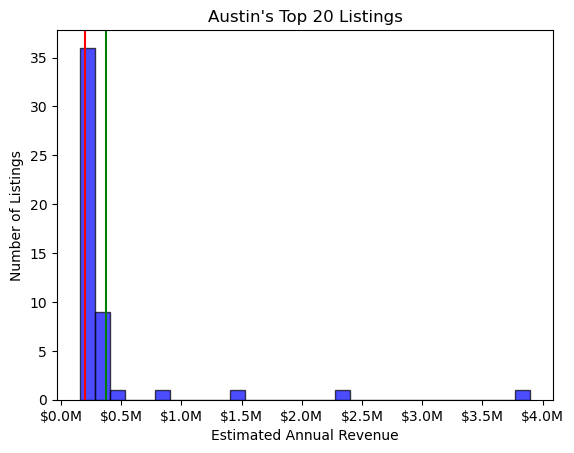

In [11]:
plt.hist(top_locations['estimated_revenue_l365d'], bins=30, color='blue',edgecolor='black',alpha=0.7)
plt.axvline(top_locations['estimated_revenue_l365d'].mean(), color='green')
plt.axvline(top_locations['estimated_revenue_l365d'].median(), color='red')
plt.xlabel("Estimated Annual Revenue")
plt.ylabel("Number of Listings")
plt.title("Austin's Top 20 Listings")
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))
plt.savefig('../../visuals/histogram_austin_top_20.png')
plt.show()